----------------------------------------------------------------------------------------------------------------------------------------------------
Analiza Textului (Descrierea Vinului)
----------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

-----------------------------------------------------------------------------------------------------------
1.	Analiză preliminară:

◦	Găsiți cele mai frecvente cuvinte din coloana description (excludeți cuvintele comune, cum ar fi „și”, „este”).

◦	Determinați lungimea medie a descrierii vinurilor.


In [17]:
df = pd.read_csv("wine_clean2.csv")

# Lungimea medie înainte de curatare
df['description_length'] = df['description'].str.len()
avg_length_before = df['description_length'].mean()
print(f"Lungimea medie înainte de curățare: {avg_length_before:.2f} caractere")

# Top 20 cuvinte înainte de curatare
all_words = " ".join(df['description'].dropna().astype(str))
words = re.findall(r'\b\w+\b', all_words.lower())
word_counts = Counter(words)
top20_before = word_counts.most_common(20)

print("\n=== Top 20 cuvinte înainte de curățare ===")
for word, count in top20_before:
    print(f"{word}: {count}")

domain_stopwords = {
    "wine", "flavor", "flavors", "aroma", "aromas", 
    "fruit", "finish", "notes", "palate", "s"
}
stopwords = set(ENGLISH_STOP_WORDS) | domain_stopwords


# Funcția de curatare a textului
def remove_stopwords(text):
    words = re.findall(r'\b\w+\b', str(text).lower())
    words_cleaned = [w for w in words if w not in stopwords]
    return " ".join(words_cleaned)

df['description_cleaned'] = df['description'].apply(remove_stopwords)

# Lungimea medie după curatare
avg_length_after = df['description_cleaned'].str.len().mean()
print(f"\nLungimea medie după curățare: {avg_length_after:.2f} caractere")

# Top 20 cuvinte după curatare
all_words_cleaned = " ".join(df['description_cleaned'].astype(str))
word_counts_cleaned = Counter(re.findall(r'\b\w+\b', all_words_cleaned))
top20_after = word_counts_cleaned.most_common(20)

print("\n=== Top 20 cuvinte după curățare ===")
for word, count in top20_after:
    print(f"{word}: {count}")

# Înlocuim coloana originala description cu cea curatata
df['description'] = df['description_cleaned']

df = df.drop(columns=['description_cleaned', 'description_length'])

df.to_csv("wine_clean_final.csv", index=False)
print("\nDatasetul final a fost salvat ca 'wine_clean_final.csv'")

Lungimea medie înainte de curățare: 224.31 caractere

=== Top 20 cuvinte înainte de curățare ===
and: 148064
the: 90633
a: 74862
of: 70063
with: 53761
this: 42228
is: 36521
it: 34289
wine: 31908
in: 26609
flavors: 26214
s: 23237
to: 22575
fruit: 22208
on: 19376
palate: 16577
that: 15827
aromas: 15338
finish: 14452
tannins: 13779

Lungimea medie după curățare: 145.96 caractere

=== Top 20 cuvinte după curățare ===
tannins: 13779
acidity: 13414
cherry: 12684
black: 12002
ripe: 11067
drink: 10081
nose: 9491
red: 9072
oak: 8536
spice: 7895
rich: 7751
dry: 7471
fresh: 7026
sweet: 6375
berry: 5944
plum: 5785
blackberry: 5601
soft: 5582
apple: 5489
dark: 5239

Datasetul final a fost salvat ca 'wine_clean_final.csv'


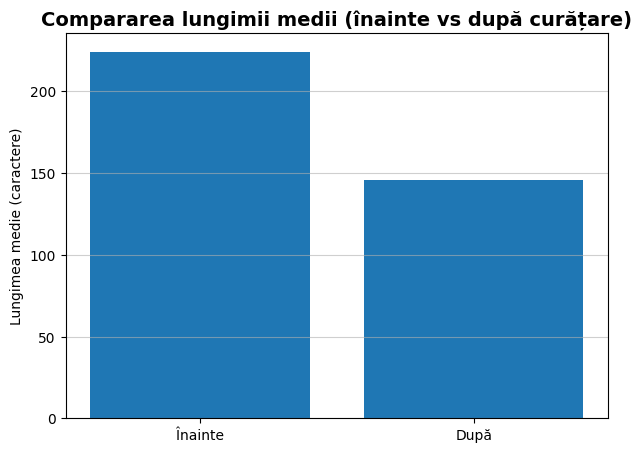

In [10]:
plt.figure(figsize=(7,5))
plt.bar(["Înainte", "După"], [avg_length_before, avg_length_after])
plt.title("Compararea lungimii medii (înainte vs după curățare)", fontsize=14, weight='bold')
plt.ylabel("Lungimea medie (caractere)")
plt.grid(axis="y", alpha=0.6)
plt.show()

-----------------------------------------------------------------------------------------------------------
2.	Wordcloud:

◦	Generați un wordcloud pentru a vizualiza cele mai frecvente cuvinte din descriere

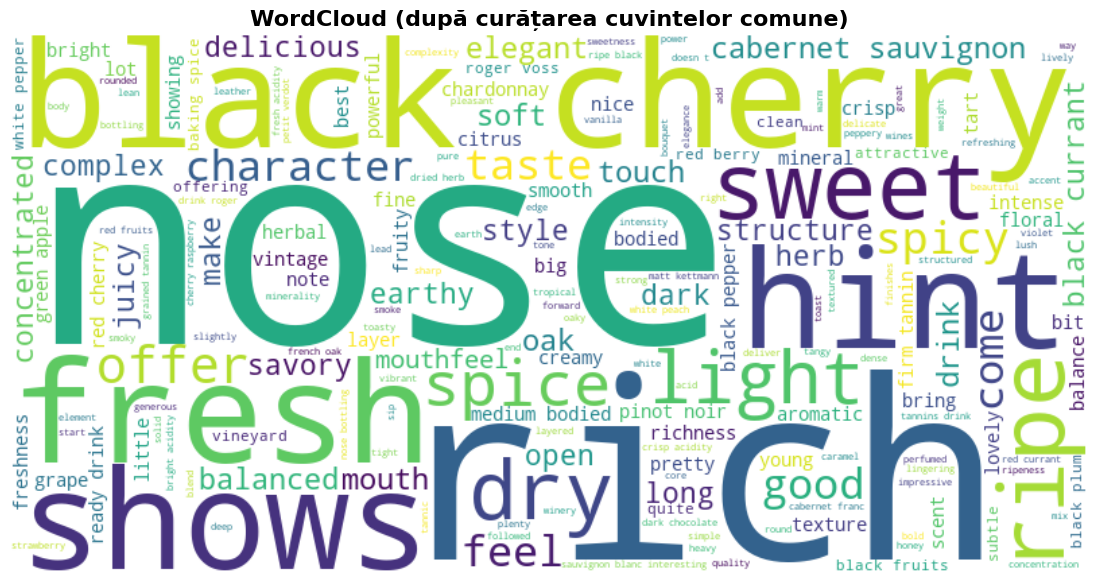

In [18]:
df_clean = pd.read_csv("wine_clean_final.csv")

text_cleaned = " ".join(df_clean['description'].astype(str))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text_cleaned)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud (după curățarea cuvintelor comune)", fontsize=16, weight='bold')
plt.show()

-----------------------------------------------------------------------------------------------------------
3.	Word corellation analysis:

◦	Efectuați o analiză de corelare a cuvintelor cele mai frecvente cu prețul și ratingul

◦	Efectuați o analiză de corelare a cuvintelor cele mai frecvente cu soiuri

C:\Users\Admin\AppData\Local\Temp\ipykernel_17360\2950039549.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_price.values, y=correlation_price.index, palette="viridis")


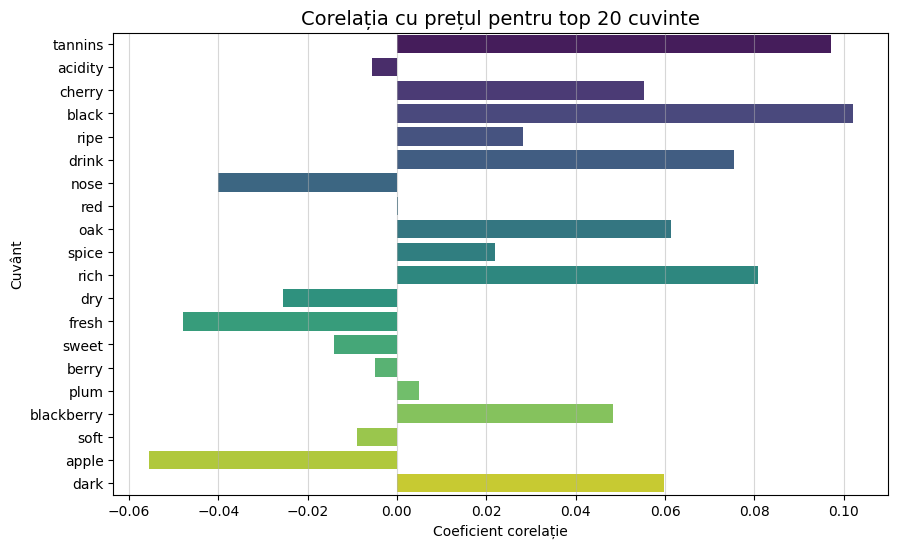

C:\Users\Admin\AppData\Local\Temp\ipykernel_17360\2950039549.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_points.values, y=correlation_points.index, palette="viridis")


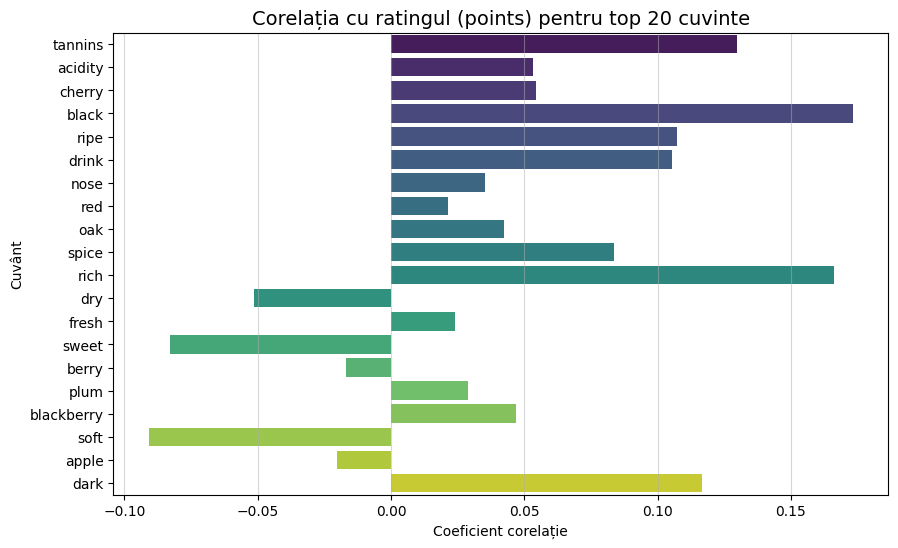

In [19]:
df = pd.read_csv("wine_clean_final.csv")

df['price'] = df['price']
df['points'] = df['points']

# Extragem top 20 cuvinte din description
all_words = " ".join(df['description'].astype(str))
words = re.findall(r'\b\w+\b', all_words.lower())
top20_words = [w for w, c in Counter(words).most_common(20)]

# Creăm coloane pentru frecventa fiecarui cuvânt
for word in top20_words:
    df[word] = df['description'].str.count(r'\b{}\b'.format(word))

# Calculăm corelatia cu price si points
correlation_price = df[top20_words + ['price']].corr()['price'].drop('price')
correlation_points = df[top20_words + ['points']].corr()['points'].drop('points')

# Grafic pentru corelatia cu price
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_price.values, y=correlation_price.index, palette="viridis")
plt.title("Corelația cu prețul pentru top 20 cuvinte", fontsize=14)
plt.xlabel("Coeficient corelație")
plt.ylabel("Cuvânt")
plt.grid(axis="x", alpha=0.5)
plt.show()

# Grafic pentru corelatia cu points (rating)
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_points.values, y=correlation_points.index, palette="viridis")
plt.title("Corelația cu ratingul (points) pentru top 20 cuvinte", fontsize=14)
plt.xlabel("Coeficient corelație")
plt.ylabel("Cuvânt")
plt.grid(axis="x", alpha=0.5)
plt.show()



=== Correlation top words with price & points ===
         tannins   acidity    cherry     black      ripe     drink      nose  \
price   0.097210 -0.005517  0.055289  0.102070  0.028252  0.075399 -0.040061   
points  0.129811  0.053138  0.054243  0.173317  0.107419  0.105521  0.035336   

             red       oak     spice      rich       dry     fresh     sweet  \
price   0.000169  0.061423  0.021989  0.080904 -0.025411 -0.047762 -0.014054   
points  0.021577  0.042207  0.083491  0.166262 -0.051206  0.024067 -0.082994   

           berry      plum  blackberry      soft     apple      dark  
price  -0.004913  0.005008    0.048397 -0.008956 -0.055590  0.059777  
points -0.016913  0.028735    0.046908 -0.090946 -0.020296  0.116503  


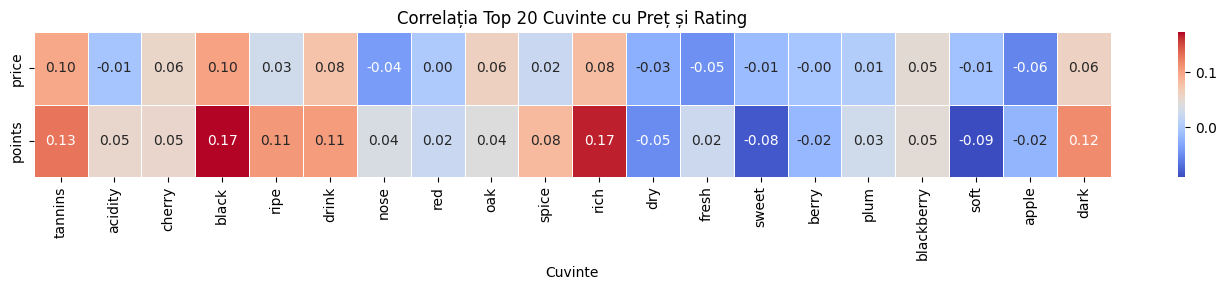

In [20]:
df = pd.read_csv("wine_clean_final.csv")

all_words = " ".join(df["description"].dropna())
words = re.findall(r'\b[a-z0-9]+\b', all_words)
word_counts = Counter(words)

top20_words = [w for w, c in word_counts.most_common(20)]
# print("\nTop 20 Words:", top20_words)

# Creăm o coloană pentru fiecare cuvânt (numărul de apariții în fiecare descriere)
for word in top20_words:
    df[f"{word}"] = df["description"].str.count(rf"\b{word}\b")

# CORELAȚIA cu price și points
corr_cols = [f"{w}" for w in top20_words] + ["price", "points"]

corr_matrix = df[corr_cols].corr().loc[["price", "points"], top20_words]
# corr_matrix = df[corr_cols].corr()[["price", "points"]].iloc[:-2]

print("\n=== Correlation top words with price & points ===")
print(corr_matrix)


plt.figure(figsize=(14, 3))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Correlația Top 20 Cuvinte cu Preț și Rating")
plt.xlabel("Cuvinte")
plt.tight_layout()
plt.show()


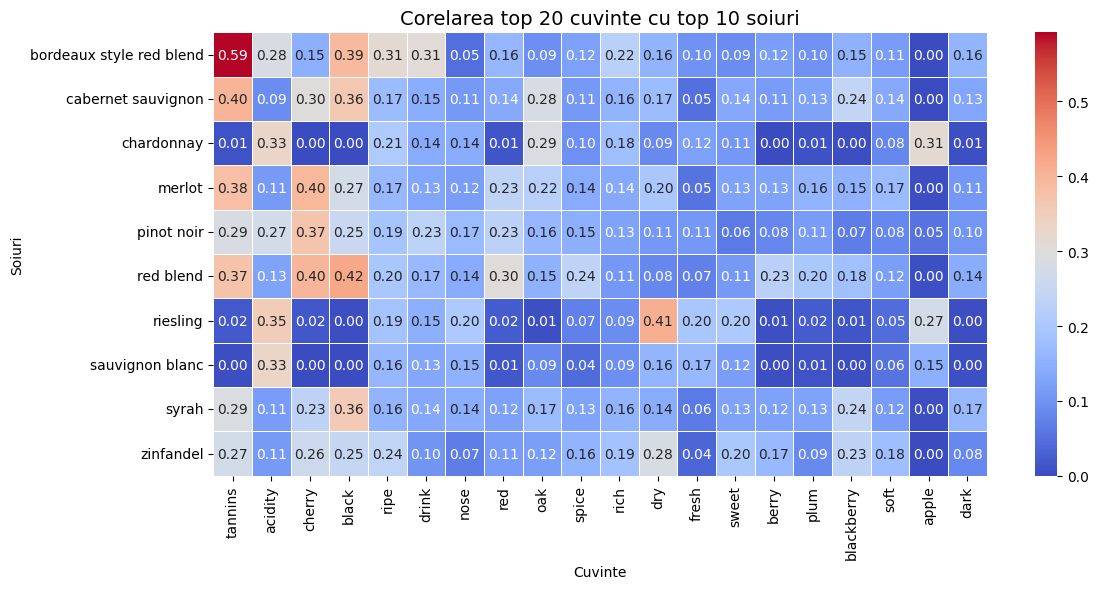

In [16]:
df = pd.read_csv("wine_clean_final.csv")
df['variety'] = df['variety']

# Top 20 cuvinte
all_words = " ".join(df['description'].astype(str))
words = re.findall(r'\b\w+\b', all_words.lower())
top20_words = [w for w, c in Counter(words).most_common(20)]

# Frecventa fiecarui cuvant în fiecare descriere
for word in top20_words:
    df[word] = df['description'].str.count(r'\b{}\b'.format(word))

# Top 10 soiuri cu cele mai multe înregistrări
top_varieties = df['variety'].value_counts().head(10).index
df_top = df[df['variety'].isin(top_varieties)]

# Medie frecventa cuvinte pe soiuri
df_grouped = df_top.groupby('variety')[top20_words].mean()

plt.figure(figsize=(12,6))
sns.heatmap(df_grouped, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Corelarea top 20 cuvinte cu top 10 soiuri", fontsize=14)
plt.xlabel("Cuvinte")
plt.ylabel("Soiuri")
plt.tight_layout()
plt.show()
